In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [7]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier(n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'rfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130, 170, 210], 
              'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17, 21, 26, 31]}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(recall_score, average='macro', greater_is_better=True))

In [8]:
model_gsv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x0000019EB34E9FA0>),
                                       ('rfc',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={'rfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130,
                                            170, 210],
                         'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17,
                                                   21, 26, 31]},
             scoring=make_scorer(recall_score, average=macro))

In [9]:
model_gsv.best_params_

{'rfc__max_depth': 5, 'rfc__min_samples_leaf': 1}

In [10]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_rfc__max_depth', 'param_rfc__min_samples_leaf',  'mean_test_score', 'rank_test_score']]
result

,param_rfc__max_depth,param_rfc__min_samples_leaf,mean_test_score,rank_test_score
0,2,1,0.554996,130
1,2,2,0.601088,122
2,2,3,0.605791,121
3,2,4,0.582911,127
4,2,5,0.560388,129
...,...,...,...,...
127,210,13,0.770522,58
128,210,17,0.773656,41
129,210,21,0.774063,38
130,210,26,0.775268,26


In [11]:
y_test_pred = model_gsv.predict(X_test)

In [12]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       822
           1       0.88      0.65      0.75      1217
           2       0.58      0.90      0.71       461

    accuracy                           0.75      2500
   macro avg       0.74      0.79      0.74      2500
weighted avg       0.78      0.75      0.75      2500



In [13]:
confusion_matrix(y_test,y_test_pred)

array([[659,  71,  92],
       [218, 793, 206],
       [  5,  40, 416]], dtype=int64)

Text(0, 0.5, 'Feature Importance')

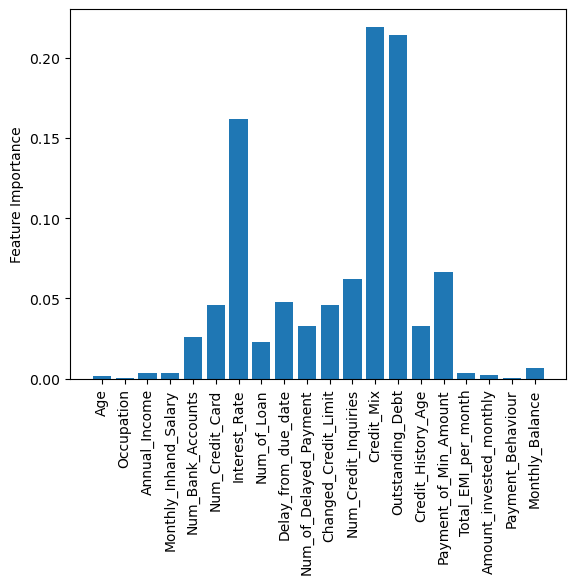

In [14]:
plt.bar(model_gsv.best_estimator_.steps[0][1].transform(X_train).columns, model_gsv.best_estimator_.steps[1][1].feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

In [15]:
y_test_pred_proba = model_gsv.predict_proba(X_test)
y_test_pred_proba

array([[0.08525542, 0.78388907, 0.13085551],
       [0.09649586, 0.85434095, 0.04916319],
       [0.17284841, 0.32624751, 0.50090408],
       ...,
       [0.07235685, 0.85589442, 0.07174873],
       [0.12551109, 0.77459631, 0.0998926 ],
       [0.08756147, 0.23169004, 0.68074849]])

Text(0.5, 1.0, 'Receiver Operating Characteristic - RandomForestClassifier')

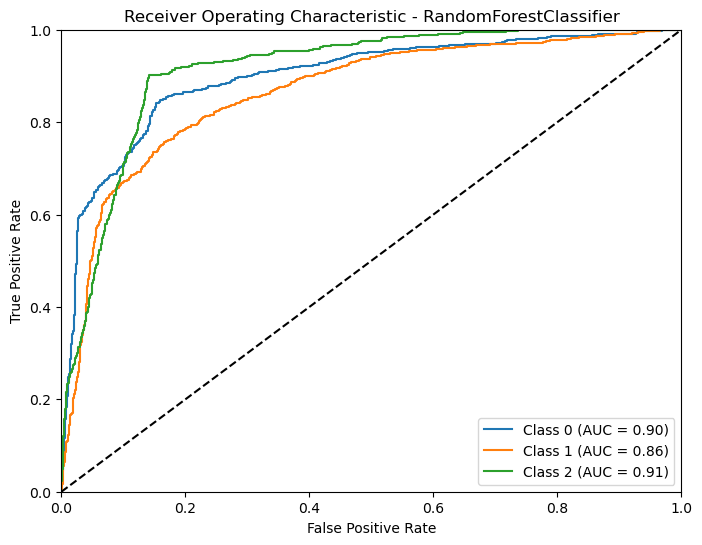

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for class_idx in range(len(model_gsv.best_estimator_.classes_)):
    y_true = (y_test == model_gsv.best_estimator_.classes_[class_idx]).astype(int)
    y_pred_proba = y_test_pred_proba[:, class_idx]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {model_gsv.best_estimator_.classes_[class_idx]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - RandomForestClassifier')

In [17]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC,PrecisionRecallCurve,ClassPredictionError,DiscriminationThreshold

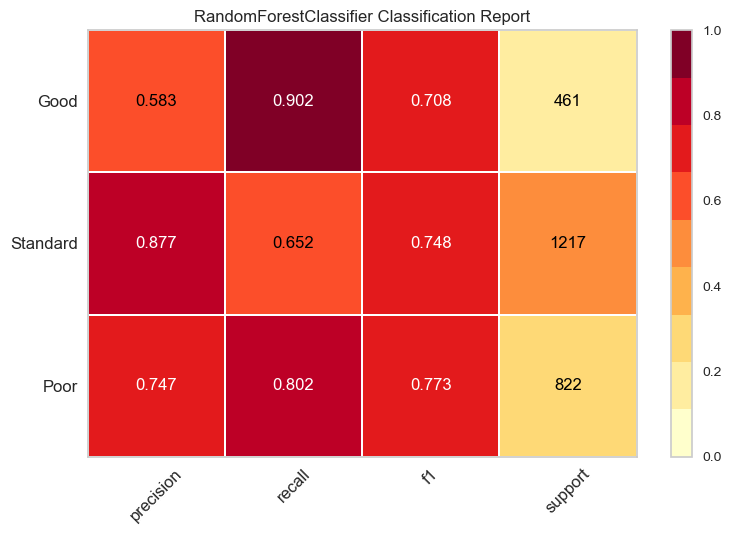

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [18]:
model = model_gsv.best_estimator_
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

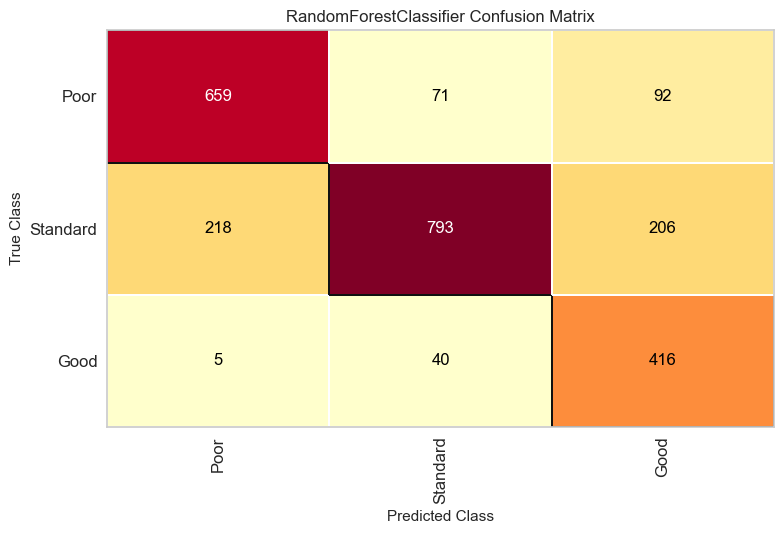

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [19]:
model = model_gsv.best_estimator_
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

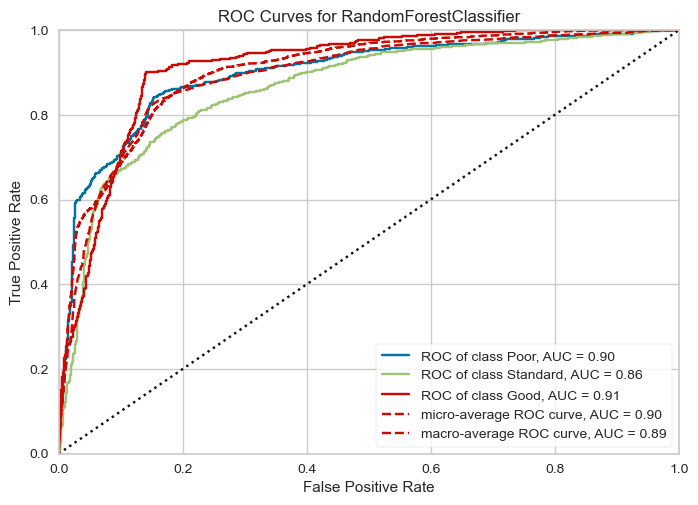

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
model = model_gsv.best_estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

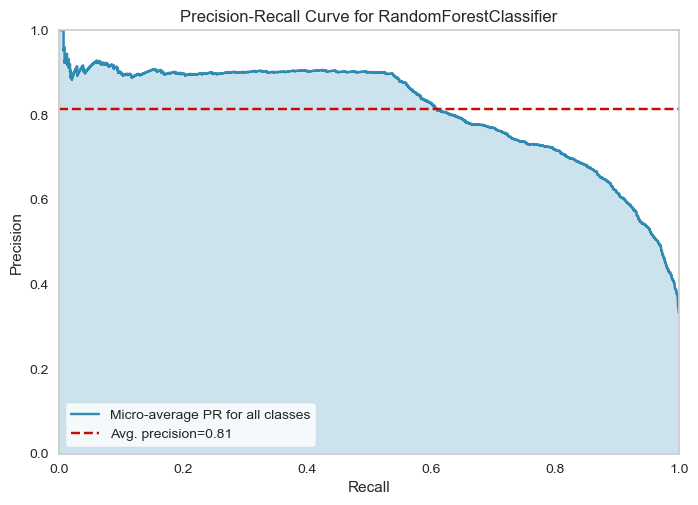

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [21]:
model = model_gsv.best_estimator_
visualizer = PrecisionRecallCurve(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

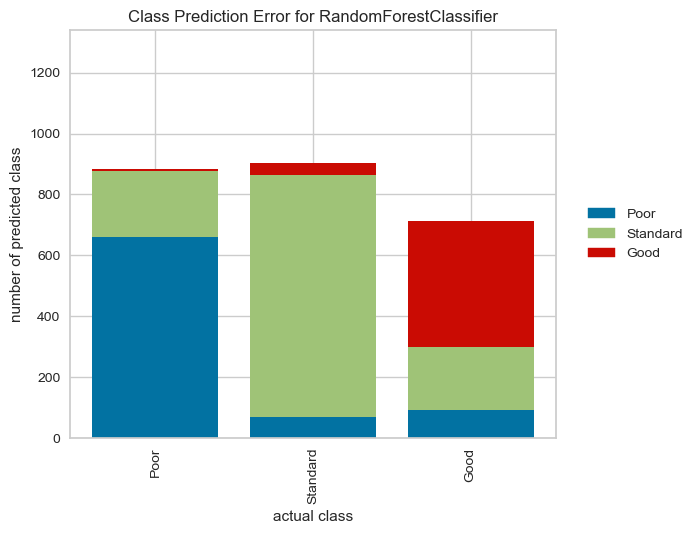

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [22]:
model = model_gsv.best_estimator_
visualizer = ClassPredictionError(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()